In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
data = {
        # "SquuezeViT_3_NIH_EXP_1":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp1/epoch_100.pth"),
        # "DenseNet_121_Pretrained":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp2/epoch_100.pth"),
        # "DenseNet_121_init":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp3/epoch_100.pth"),
        # "DenseNet_2":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp4/epoch_100.pth"),
        "SqueezeVIT":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp1/epoch_100.pth"),
        "SqueezeNet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp7/epoch_100.pth"),
        "Densenet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp3/epoch_100.pth"),
        "Mobilenet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp5/epoch_100.pth"),
        "Resnet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp9/epoch_100.pth"),
        "Shufflenet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp10/epoch_100.pth"),
        "MobileVit":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp8/epoch_100.pth")
}

In [4]:
# data["final Exp 1"]["history"]["test"].keys()

In [5]:
Epoch = 100

In [6]:
loss_data = {}

In [7]:
# data["Test Exp"]["history"]['val']['F1Score']

In [8]:
for exps in data.keys():
    train_loss = []
    val_loss = []
    for i in data[exps]["history"]['train']["loss"]:
        val = i.cpu().item()
        train_loss.append(val)
    for i in data[exps]["history"]['val']["loss"]:
        val = i.cpu().item()
        # print(val)
        val_loss.append(val)
    loss_data[exps] = (train_loss,val_loss)

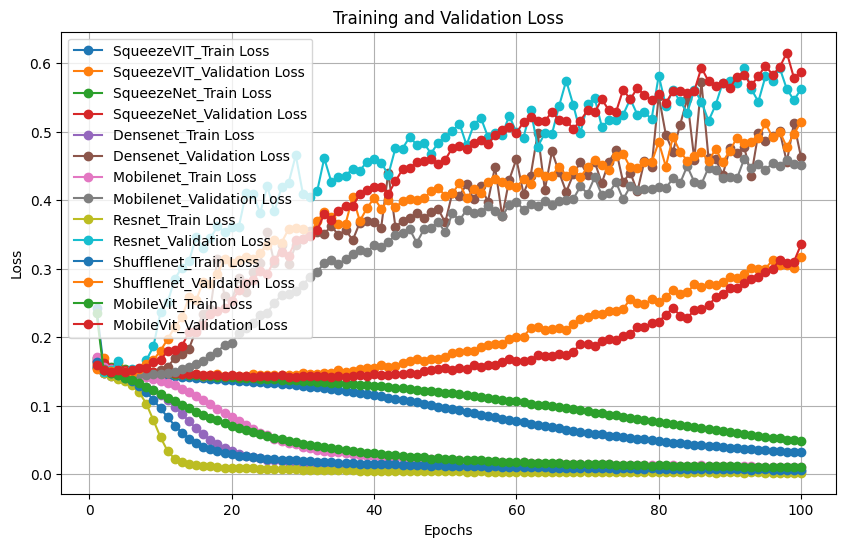

In [9]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, Epoch+1))
# train_loss = data['train']["loss"]
# val_loss = data['val']["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
for exps in loss_data.keys():
    plt.plot(epochs, loss_data[exps][0], label=exps + '_Train Loss', marker='o')
    plt.plot(epochs, loss_data[exps][1], label=exps + '_Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import plotly.graph_objects as go

# Create the interactive plot
fig = go.Figure()
for exps in loss_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    fig.add_trace(go.Scatter(x=epochs, y=loss_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=loss_data[exps][1], mode='lines+markers', name=exps + '_Validation Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Training and Validation Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    grid=dict(),
)

fig.show()

In [11]:
acc_data = {}
for exps in data.keys():
    train_acc = []
    val_acc = []
    for i in data[exps]["history"]['train']["ExactMatchAccuracy"]:
        val = i
        train_acc.append(val)
    for i in data[exps]["history"]['val']["ExactMatchAccuracy"]:
        val = i
        # print(val)
        val_acc.append(val)
    acc_data[exps] = (train_acc,val_acc)

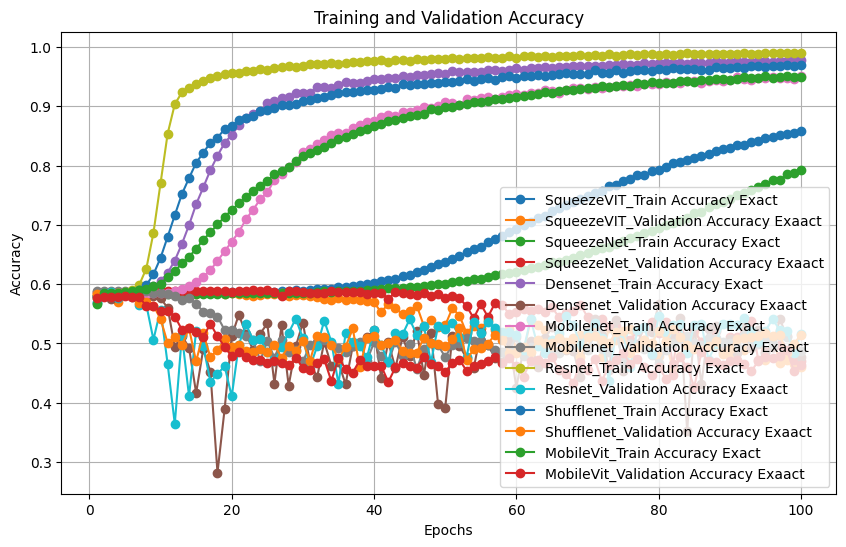

In [12]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, Epoch + 1))
# train_loss = data['train']["loss"]
# val_loss = data['val']["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
for exps in loss_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + '_Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + '_Validation Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][0], label=exps + '_Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + '_Validation Loss', marker='o')
    plt.plot(epochs, acc_data[exps][0], label=exps + '_Train Accuracy Exact', marker='o')
    plt.plot(epochs, acc_data[exps][1], label=exps + '_Validation Accuracy Exaact', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [13]:

# Create the interactive plot
fig = go.Figure()
for exps in loss_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    fig.add_trace(go.Scatter(x=epochs, y=acc_data[exps][0], mode='lines+markers', name=exps + '_Train Accuracy'))
    fig.add_trace(go.Scatter(x=epochs, y=acc_data[exps][1], mode='lines+markers', name=exps + '_Validation Accuracy'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Training and Validation Accuracy',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    grid=dict(),
)

fig.show()

In [14]:
val_auroc_data = {}
for exps in data.keys():
    avg_auroc = []
    for epoch, score_list in enumerate(data[exps]["history"]['val']['MultiLabelAUROC']):
        avg_auroc.append(sum(score_list)/len(score_list))
    val_auroc_data[exps] = avg_auroc

In [15]:
train_auroc_data = {}
for exps in data.keys():
    avg_auroc = []
    for epoch, score_list in enumerate(data[exps]["history"]['train']['MultiLabelAUROC']):
        avg_auroc.append(sum(score_list)/len(score_list))
    train_auroc_data[exps] = avg_auroc

In [16]:
test_auroc_data = {}
for exps in data.keys():
    avg_auroc = []
    for epoch, score_list in enumerate(data[exps]["history"]['test']['MultiLabelAUROC']):
        avg_auroc.append(sum(score_list)/len(score_list))
    test_auroc_data[exps] = avg_auroc

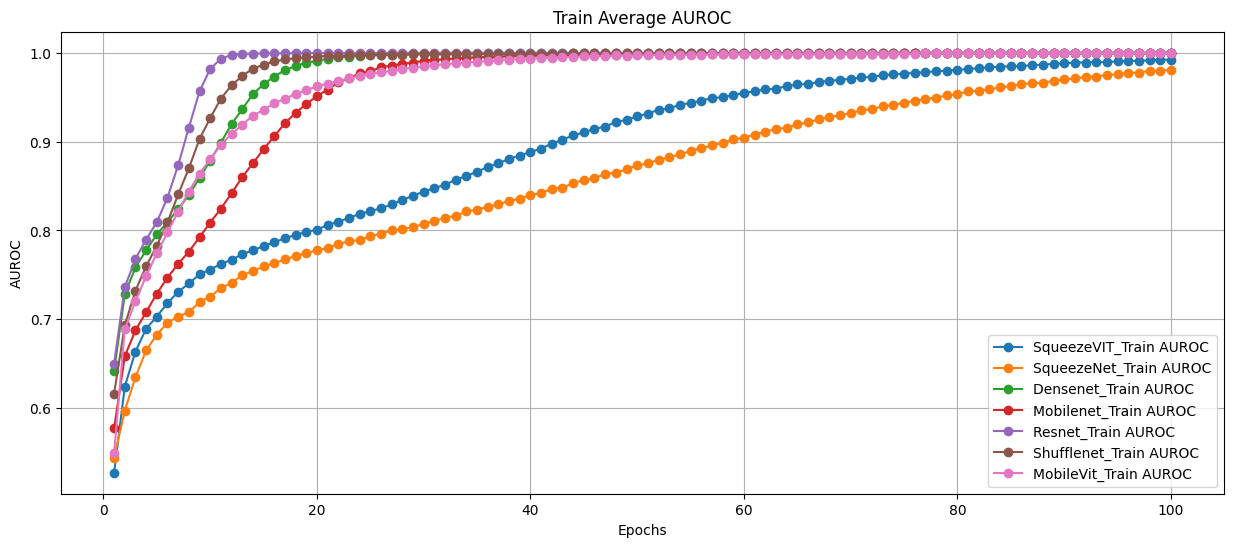

In [17]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in train_auroc_data.keys():
    plt.plot(epochs, train_auroc_data[exps], label=exps + '_Train AUROC', marker='o')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Train Average AUROC')
plt.legend()
plt.grid(True)
plt.show()

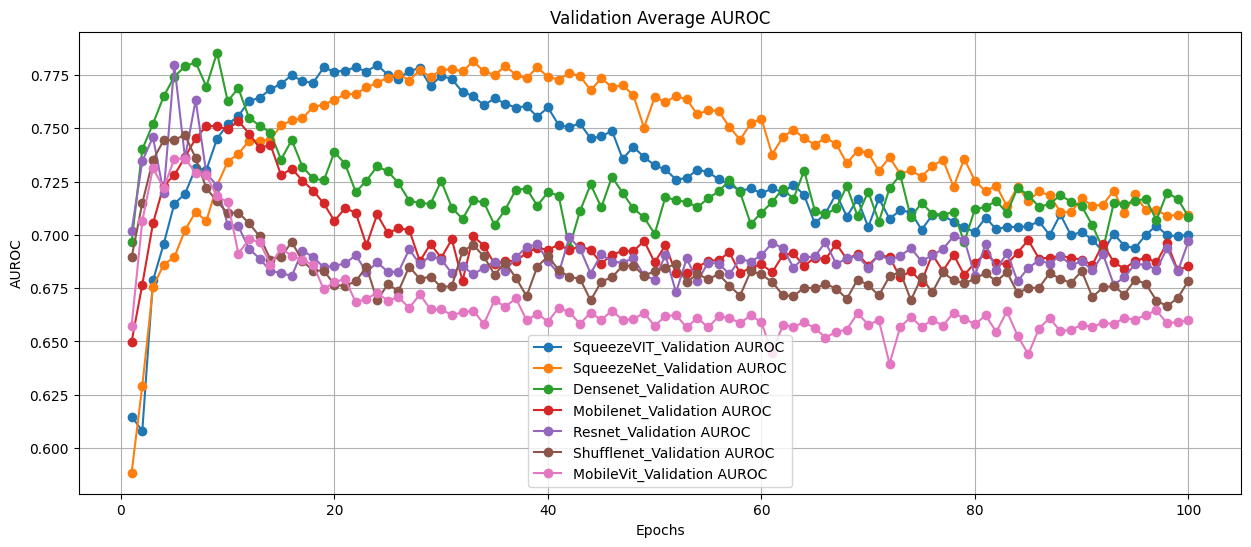

In [18]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in val_auroc_data.keys():
    plt.plot(epochs, val_auroc_data[exps], label=exps + '_Validation AUROC', marker='o')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Validation Average AUROC')
plt.legend()
plt.grid(True)
plt.show()

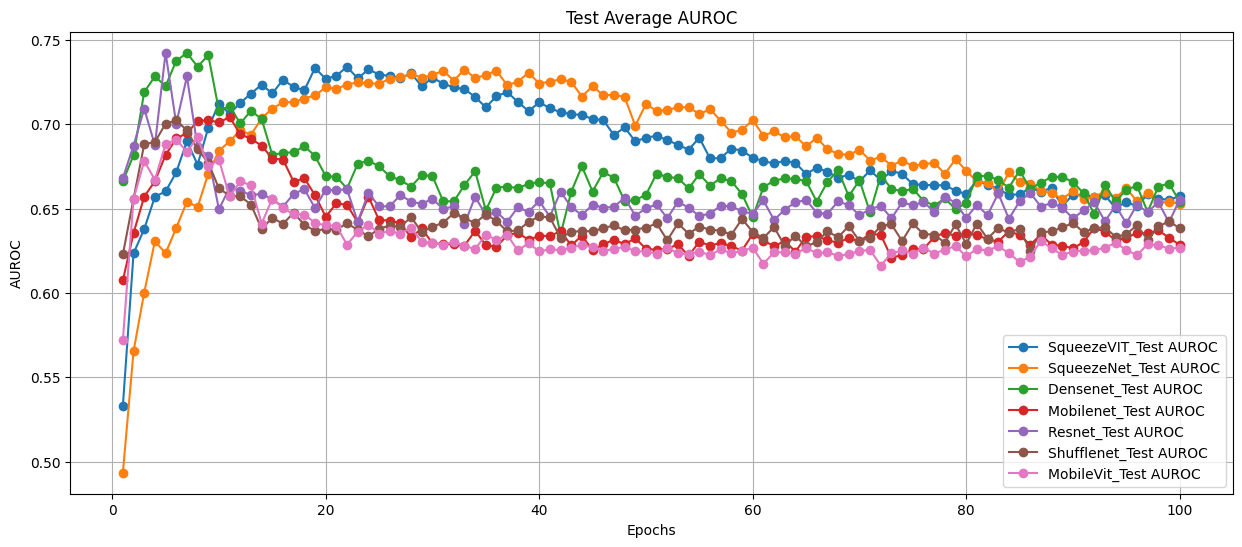

In [19]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in test_auroc_data.keys():
    plt.plot(epochs, test_auroc_data[exps], label=exps + '_Test AUROC', marker='o')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Test Average AUROC')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
fig = go.Figure()
for exps in train_auroc_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=train_auroc_data[exps], mode='lines+markers', name=exps + '_Train AUROC'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Train Average AUROC',
    xaxis_title='Epochs',
    yaxis_title='AUROC',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [21]:
import plotly.graph_objects as go

# Create the interactive plot
fig = go.Figure()
for exps in val_auroc_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=val_auroc_data[exps], mode='lines+markers', name=exps + '_Validation AUROC'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Validation Average AUROC',
    xaxis_title='Epochs',
    yaxis_title='AUROC',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [22]:
fig = go.Figure()
for exps in test_auroc_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=test_auroc_data[exps], mode='lines+markers', name=exps + '_Test AUROC'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Test Average AUROC',
    xaxis_title='Epochs',
    yaxis_title='AUROC',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [23]:
train_f1score_data = {}
for exps in data.keys():
    avg_f1score = []
    for epoch, score_list in enumerate(data[exps]["history"]['train']['F1Score']):
        avg_f1score.append(sum(score_list)/len(score_list))
    train_f1score_data[exps] = avg_f1score

In [24]:
val_f1score_data = {}
for exps in data.keys():
    avg_f1score = []
    for epoch, score_list in enumerate(data[exps]["history"]['val']['F1Score']):
        avg_f1score.append(sum(score_list)/len(score_list))
    val_f1score_data[exps] = avg_f1score

In [25]:
test_f1score_data = {}
for exps in data.keys():
    avg_f1score = []
    for epoch, score_list in enumerate(data[exps]["history"]['test']['F1Score']):
        avg_f1score.append(sum(score_list)/len(score_list))
    test_f1score_data[exps] = avg_f1score

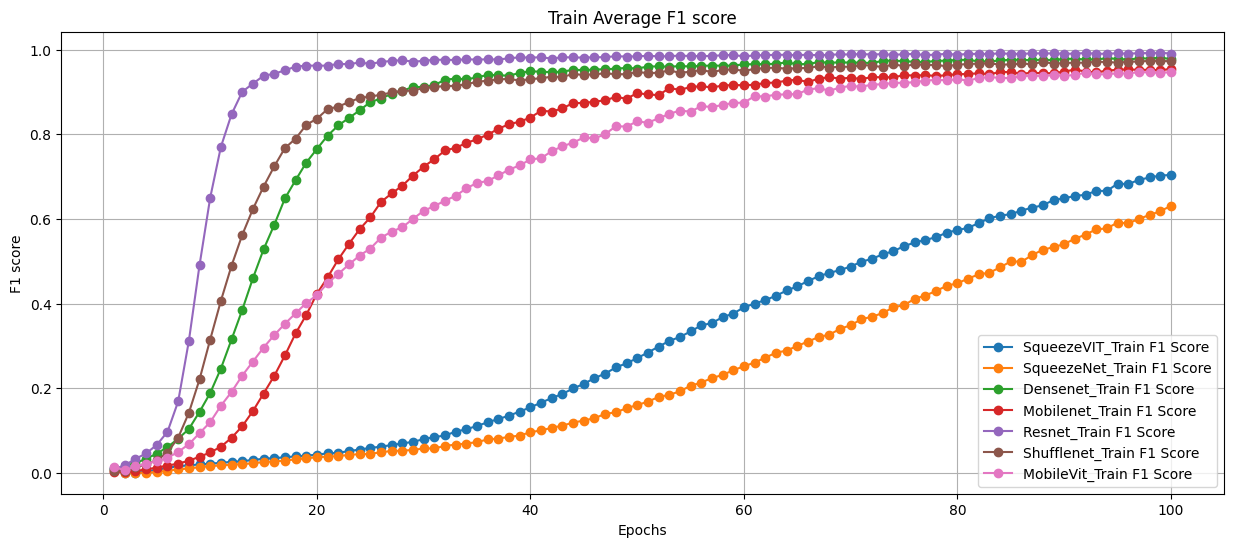

In [26]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in train_f1score_data.keys():
    plt.plot(epochs, train_f1score_data[exps], label=exps + '_Train F1 Score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.title('Train Average F1 score')
plt.legend()
plt.grid(True)
plt.show()

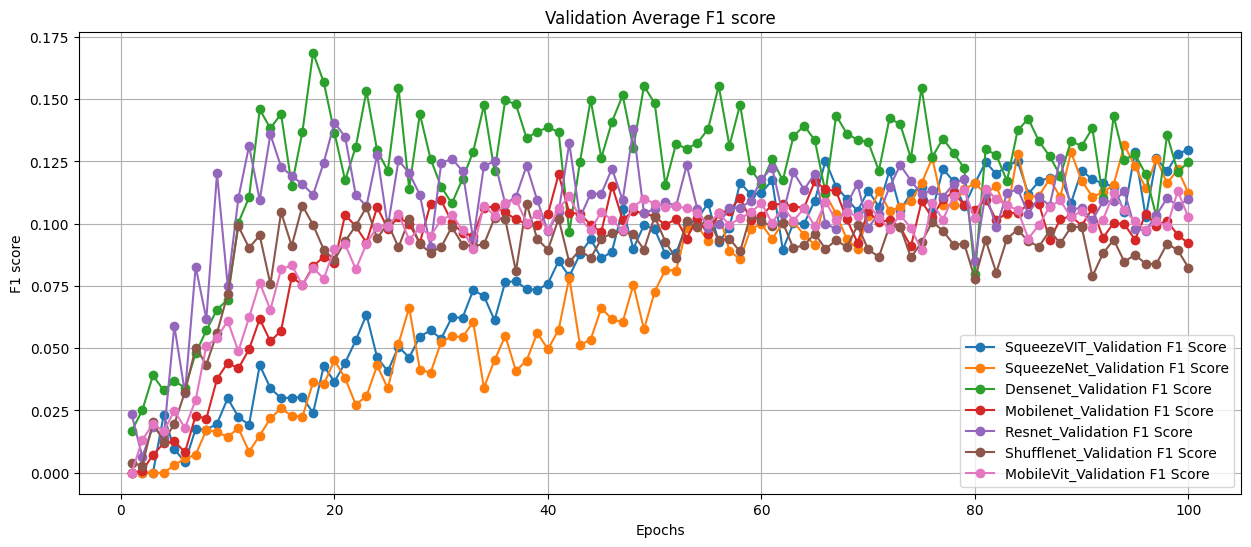

In [27]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in val_f1score_data.keys():
    plt.plot(epochs, val_f1score_data[exps], label=exps + '_Validation F1 Score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.title('Validation Average F1 score')
plt.legend()
plt.grid(True)
plt.show()

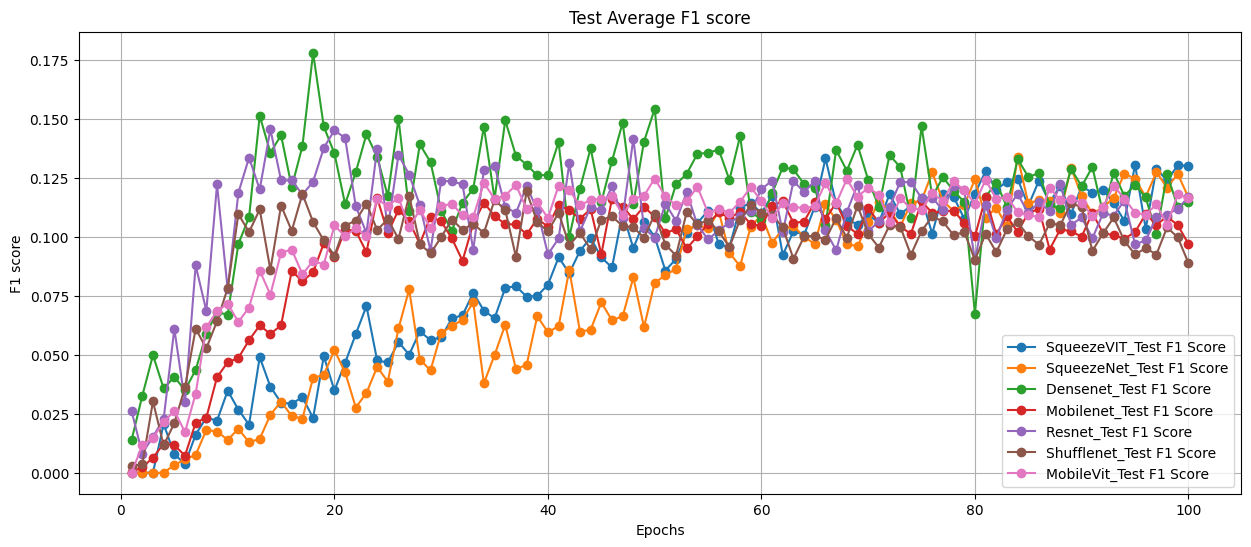

In [28]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in test_f1score_data.keys():
    plt.plot(epochs, test_f1score_data[exps], label=exps + '_Test F1 Score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.title('Test Average F1 score')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
fig = go.Figure()
for exps in train_f1score_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=train_f1score_data[exps], mode='lines+markers', name=exps + '_Train F1 Score'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Train Average F1 Score',
    xaxis_title='Epochs',
    yaxis_title='F1 Score',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [30]:
fig = go.Figure()
for exps in val_f1score_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=val_f1score_data[exps], mode='lines+markers', name=exps + '_Validation F1 Score'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Validaton Average F1 Score',
    xaxis_title='Epochs',
    yaxis_title='F1 Score',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [31]:
fig = go.Figure()
for exps in test_f1score_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=test_f1score_data[exps], mode='lines+markers', name=exps + '_Test F1 Score'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Test Average F1 Score',
    xaxis_title='Epochs',
    yaxis_title='F1 Score',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [32]:
import numpy
import pandas as pd
from tabulate import tabulate
column_names = ["Model","Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9", "Class 10", "Class 11", "Class 12", "Class 13", "Class 14"]
best_model = []
print("NIH Multilabel")
print()
for key in test_auroc_data.keys():
    print(key, numpy.argmax(test_auroc_data[key]))
    best_model.append([key] + data[key]["history"]['test']['MultiLabelAUROC'][numpy.argmax(test_auroc_data[key])])

NIH Multilabel

SqueezeVIT 21
SqueezeNet 32
Densenet 6
Mobilenet 10
Resnet 4
Shufflenet 5
MobileVit 7


In [33]:
print(best_model)
df = pd.DataFrame(best_model, columns=column_names)
df

[['SqueezeVIT', 0.7215418964557152, 0.8335333127658365, 0.7844360392811163, 0.6699419717856833, 0.6959356603070399, 0.6457495607800098, 0.6548499739706162, 0.7820158820535348, 0.7079013815575853, 0.8157607958572655, 0.7320345672331924, 0.7409829205662659, 0.7081477817767361, 0.7830777715989169], ['SqueezeNet', 0.70947405882985, 0.8566399763411492, 0.7798672436617036, 0.6711410946933503, 0.716594232004833, 0.6314252846425942, 0.6375666789348351, 0.7711673318348061, 0.7070011328116539, 0.8190080048026626, 0.7249915138198997, 0.732227991961652, 0.7035594986278783, 0.7929669623403499], ['Densenet', 0.7233450135720101, 0.8596191677120455, 0.7864213523161738, 0.6609113458377984, 0.7225877472850556, 0.6554638293403554, 0.6517182811180655, 0.7879152262235766, 0.7125994395831662, 0.8186672611568239, 0.7417420814352922, 0.7347648499981955, 0.713924303301289, 0.8219275614670034], ['Mobilenet', 0.6828505472649543, 0.8119434480540202, 0.7505532394173955, 0.6539191129505106, 0.6356184635605977, 0.57

,Model,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,Class 10,Class 11,Class 12,Class 13,Class 14
0,SqueezeVIT,0.721542,0.833533,0.784436,0.669942,0.695936,0.645750,0.654850,0.782016,0.707901,0.815761,0.732035,0.740983,0.708148,0.783078
1,SqueezeNet,0.709474,0.856640,0.779867,0.671141,0.716594,0.631425,0.637567,0.771167,0.707001,0.819008,0.724992,0.732228,0.703559,0.792967
2,Densenet,0.723345,0.859619,0.786421,0.660911,0.722588,0.655464,0.651718,0.787915,0.712599,0.818667,0.741742,0.734765,0.713924,0.821928
3,Mobilenet,0.682851,0.811943,0.750553,0.653919,0.635618,0.576282,0.636060,0.741565,0.699559,0.798641,0.685356,0.721057,0.691047,0.775028
4,Resnet,0.712657,0.862339,0.785866,0.672109,0.700037,0.624849,0.656325,0.762982,0.717579,0.824053,0.745451,0.760257,0.718032,0.850525
5,Shufflenet,0.690662,0.815129,0.746491,0.644144,0.616218,0.577338,0.611177,0.749549,0.695444,0.795647,0.686150,0.721919,0.672836,0.810141
6,MobileVit,0.678727,0.788803,0.749520,0.648496,0.626720,0.599011,0.612618,0.735166,0.696494,0.785175,0.675204,0.695312,0.677942,0.720750


In [34]:
df.round(3)

,Model,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,Class 10,Class 11,Class 12,Class 13,Class 14
0,SqueezeVIT,0.722,0.834,0.784,0.670,0.696,0.646,0.655,0.782,0.708,0.816,0.732,0.741,0.708,0.783
1,SqueezeNet,0.709,0.857,0.780,0.671,0.717,0.631,0.638,0.771,0.707,0.819,0.725,0.732,0.704,0.793
2,Densenet,0.723,0.860,0.786,0.661,0.723,0.655,0.652,0.788,0.713,0.819,0.742,0.735,0.714,0.822
3,Mobilenet,0.683,0.812,0.751,0.654,0.636,0.576,0.636,0.742,0.700,0.799,0.685,0.721,0.691,0.775
4,Resnet,0.713,0.862,0.786,0.672,0.700,0.625,0.656,0.763,0.718,0.824,0.745,0.760,0.718,0.851
5,Shufflenet,0.691,0.815,0.746,0.644,0.616,0.577,0.611,0.750,0.695,0.796,0.686,0.722,0.673,0.810
6,MobileVit,0.679,0.789,0.750,0.648,0.627,0.599,0.613,0.735,0.696,0.785,0.675,0.695,0.678,0.721
